In [53]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('hiring.csv')

In [3]:
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


### here we have data set for salary of candidate on basis of experience, test score and interview score

In [3]:
df.shape

(8, 4)

#### our data set has 8 rows and 4 columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   experience                  6 non-null      object 
 1   test_score(out of 10)       7 non-null      float64
 2   interview_score(out of 10)  8 non-null      int64  
 3   salary($)                   8 non-null      int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 384.0+ bytes


In [6]:
df.isna().sum()

experience                    2
test_score(out of 10)         1
interview_score(out of 10)    0
salary($)                     0
dtype: int64

#### so here we have 2 missing values in experience and 1 missing value in test score data

#### we can use median value for misssing test score

In [7]:
df.columns

Index(['experience', 'test_score(out of 10)', 'interview_score(out of 10)',
       'salary($)'],
      dtype='object')

#### for simplicity we can short the column names

In [4]:
df.columns=['ecxp','test_score','inter_score','salary']
#df.rename({'test_score(out of 10)':'test_score'},axis=1)

In [5]:
df

,ecxp,test_score,inter_score,salary
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [6]:
df.test_score.isna().sum()

1

In [8]:
test_median = df.test_score.median()

In [9]:
df.test_score = df.test_score.fillna(test_median)

In [12]:
df

,ecxp,test_score,inter_score,salary
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,8.0,7,72000
7,eleven,7.0,8,80000


In [13]:
df.test_score.isna().sum()

0

#### in experience column we have 2 missing values and experience give in word, let we consider non value 2 candidates has zero experience

In [16]:
df.ecxp = df.ecxp.fillna('zero')
df

,ecxp,test_score,inter_score,salary
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,8.0,7,72000
7,eleven,7.0,8,80000


#### as we need numeric values for machine learning model, we have to convert experience given in word to numeric values, so we use word2number lib

In [21]:
pip install word2number

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
Using legacy 'setup.py install' for word2number, since package 'wheel' is not installed.
    Running setup.py install for word2number: started
    Running setup.py install for word2number: finished with status 'done'
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\Rupali\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [22]:
from word2number import w2n

In [24]:
df.ecxp = df.ecxp.apply(w2n.word_to_num)

In [25]:
df

,ecxp,test_score,inter_score,salary
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,8.0,7,72000
7,11,7.0,8,80000


#### now we have all our feature data values in numbers

#### so let we check relation of each independent variable with dependent variable (salary)

### Expercience Vs salary

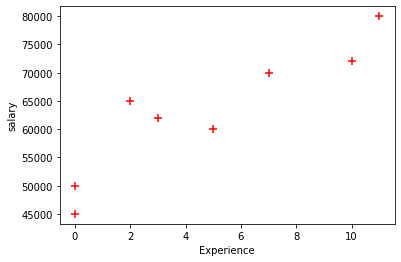

In [39]:
plt.xlabel('Experience')
plt.ylabel('salary')
plt.scatter(df.ecxp,df.salary,c='r',marker='+',s=50)
plt.show()

#### excluding 1 to 2 points all other data point shows linear relationship, also we know as experience of candidat is more it expcet more salary

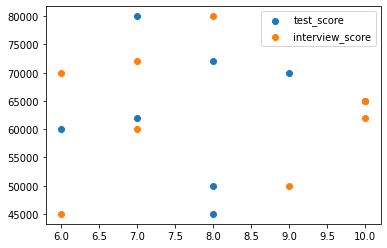

In [49]:
plt.scatter(df.test_score,df.salary,label='test_score')
plt.scatter(df.inter_score,df.salary,label='interview_score')
plt.legend()

#### it looks much scatter, usually as score is good your salary will better

## Now we make our machine learning model

### here we use multilinear regression model ,as we hvae more than one independent input and our data is continous

In [54]:
model = LinearRegression()

#### we will seperate independent and dependent variable for making model

In [55]:
df.columns

Index(['ecxp', 'test_score', 'inter_score', 'salary'], dtype='object')

In [56]:
X = df[['ecxp', 'test_score', 'inter_score']]

In [58]:
y = df.salary

In [59]:
model.fit(X,y)

LinearRegression()

In [60]:
model.coef_

array([2812.95487627, 1845.70596798, 2205.24017467])

In [61]:
model.intercept_

17737.263464337695

In [62]:
model.predict([[2,9,6]])

C:\Users\Rupali\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([53205.96797671])

#### so here we get 53205 salary for 2yr experience, 9 test score and 6 interview score 

#### now we predict for 2yr expericense, 5 test score and 8 interview score

In [67]:
model.predict([[2,5,8]])

C:\Users\Rupali\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([50233.62445415])

In [65]:
model.score(X,y)*100

96.1678000257796

## Our train model is 96% accurate